<a href="https://colab.research.google.com/github/joel-ruetas/insect-image-classification/blob/main/Convolutional_Neural_Network_for_Insect_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network for Insect Image Classification

## Author

Joel Ruetas

## Abstract

Insects play diverse roles in our environment, with some being harmful by damaging crops, spreading diseases, or causing poisoning, while others, like bees, are crucial for pollination and ecosystem balance. Accurately classifying insects is vital to understanding their impact and managing their effects on human activities and natural ecosystems. This paper explores the use of Convolutional Neural Networks (CNNs) for the classification of insect images. Specifically, we aim to determine whether a CNN can effectively identify whether an insect is harmful or beneficial based solely on its image.

## Objective

The primary objective of this research is to develop and validate a Convolutional Neural Network model capable of accurately classifying images of insects into specific categories, such as harmful or beneficial, based on their visual characteristics. This involves:

- Analyzing and processing a large dataset of insect images from the Natural History Museum, London.
- Utilizing the power of CNNs to learn and recognize patterns and features specific to different insect species.
- Evaluating the model's accuracy and effectiveness in classifying insects, which could have significant implications for environmental management, agriculture, and biological research.

Ultimately, this study aims to contribute to the field of automated image classification in entomology, providing a tool that can assist in the rapid and accurate identification of insect species, thereby enhancing our understanding and management of these crucial components of our ecosystem.

## Dataset

The dataset used in this study comprises high-resolution images of insect specimens from the British carabids collection at the Natural History Museum, London. It includes a vast array of 63,364 specimens across 291 species. Each species is organized into a specific folder, labeled with the GBIF (Global Biodiversity Information Facility) number corresponding to that species. For instance, the species 'Carabus problematicus' is stored in the folder labeled '4470555'.

Dataset Source: [Insect Identification from Habitus Images on Kaggle](https://www.kaggle.com/kmldas/insect-identification-from-habitus-images)
- **Number of Species**: 291
- **Total Specimens**: 63,364

The GBIF is a global initiative funded by governments worldwide. It provides open access to data about all life forms on Earth, thereby supporting a wide range of biological and environmental research.

### Column Descriptions for Dataset

The dataset is structured into the following columns:

- **insect_gbif**: The GBIF identification number for the insect species.
- **path_img**: The file path where the insect image is stored.
- **file_name**: The name of the image file.

## Specimen Properties for Insect Image Classification

### Image Characteristics

In this study, the dataset comprises images of insect specimens, each with specific properties that are consistent across the collection. Understanding these properties is crucial for the preprocessing and analysis phases of the Convolutional Neural Network (CNN) model development. The properties of these specimen images include:

- **Format**: All images are in JPEG (jpg) format. JPEG is a commonly used method of lossy compression for digital images, particularly for those images produced by digital photography.
  
- **Aspect Ratio**: The images maintain an aspect ratio of 640 x 480. This means that the width of the images is 640 pixels, and the height is 480 pixels. The aspect ratio is essential for maintaining consistency in image presentation and is a standard size for medium-resolution images.

- **Size**: Each image is approximately 50 kilobytes (kb) in size. The relatively small size of the images suggests that there might be some level of compression, which can affect the image quality.

### Possible Image Issues (Added Noise)

Along with the standard properties, there are certain issues or anomalies present in many of the images, which could add noise or unwanted variability to the dataset:

- **Graininess**: Most of the images exhibit a certain degree of graininess. This refers to the visual appearance of the texture in the images that can resemble a fine granular surface. Graininess can impact the model's ability to discern fine details in the images.

- **Presence of Pins**: Some images include pins, which are likely used for positioning or securing the specimens. These pins can be mistaken as part of the insect by the model if not accounted for during the preprocessing phase.

- **Labels in Images**: Several images contain labels, which might include text or other identifying marks. These labels are extraneous to the insect specimens themselves and can be misleading for the model during the classification process.

- **Specimen Damage**: Some of the specimens are damaged, which means they might not represent the typical appearance of the species. This damage can lead to inaccuracies in classification if the model learns to associate these damages with certain species characteristics.

Given these properties and potential issues, careful preprocessing and augmentation of the images might be necessary. This could involve techniques like noise reduction for graininess, object detection to identify and ignore pins and labels, and careful consideration of how to handle damaged specimens. Addressing these challenges is critical to ensure the CNN model is trained on relevant features and can accurately classify the insect images.

#### Specimen with pin and label

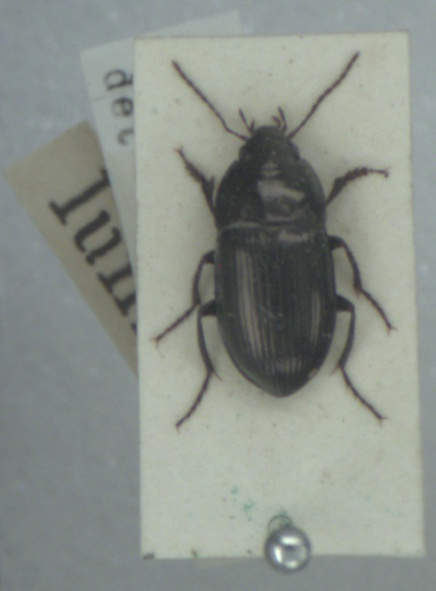

#### Specimen with label but without pin

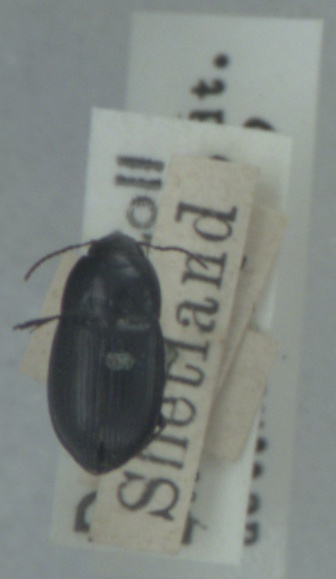

#### Damaged specimen

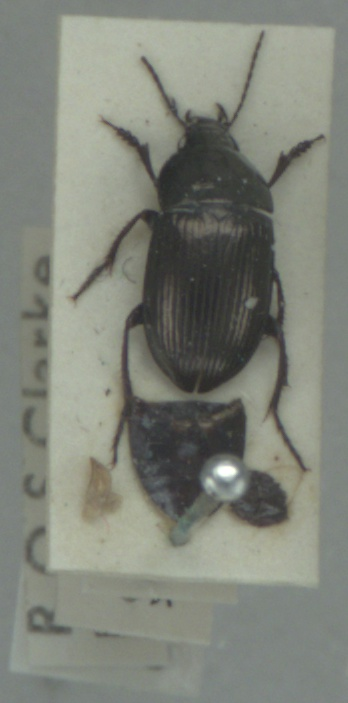

##  Import Libraries

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import os
import pandas as pd
import pickle
import PIL
import random
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
import time

from PIL import Image
from sklearn.utils import shuffle
from tqdm.notebook import tqdm

from google.colab import drive
from keras import layers
from keras.models import Sequential
from keras import backend as K
from keras import metrics
from keras.callbacks import Callback
from tensorflow import keras

tfds.disable_progress_bar()

In [ ]:
# Print the version number of TensorFlow.
print(tf.__version__)

2.12.0


## Mount Google Drive

In [ ]:
# This command mounts your Google Drive to the Colab Notebook.
# It will ask for your authorization to access the drive.
# Once authorized, you can access your drive files using the path '/content/drive'.
drive.mount('/content/drive', force_remount = True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read the data
Add a method to load images from a folder

In [ ]:
# Load the paths to the images in a directory
def load_images_from_folder(folder, only_path = False, label = ""):
    if only_path == False:
        images = []
        file_name = []
        for filename in os.listdir(folder):
            img = plt.imread(os.path.join(folder, filename))

            if img is not None:
                end = filename.find(".")
                file_name.append(open[0:end])
                images.append(img)

        return images, file_name
    else:
        path = []
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            if img_path is not None:
                path.append([label, img_path])
        return path

## Set up the data and create the dataset

In [ ]:
# Load the paths on the images
images = []

# Define the path to the directory containing the insect images
path = '/content/drive/MyDrive/Insects/'

# Iterate over each file or directory in the specified path
for f in os.listdir(path):
    # Check if the first file in the directory is a jpg image
    if 'jpg' in os.listdir(path + f)[0]:
        # If it is, load the image paths from this folder using the 'load_images_from_folder' function
        # 'only_path = True' indicates that only the path of the images is needed, not the images themselves
        # The label for the images is the folder name (f)
        images += load_images_from_folder(folder = path + f, only_path = True, label = f)

    else:
        # If the first file is not a jpg, it's a subdirectory
        # Iterate over the files in this subdirectory
        for d in os.listdir(path + f):
            # Load the image paths from each subdirectory
            images += load_images_from_folder(folder = path + f + '/' + d, only_path = True, label = f)


# Create a dataframe with the paths and the label for each insect
df = pd.DataFrame(images, columns = ['insect_gbif', 'path_img']) # Creating a DataFrame with two columns

# Extract the file name from the image paths and store it in a list
file_name = []
for i in range(len(df['path_img'])):
    # Split the path and extract the file name, then split at '.' and take the first part (the name without extension)
    temp = df.path_img[i].split('/')[-1].split('.')[0]
    file_name.append(temp)
file_name

# Add the file names as a new column in the DataFrame
df['file_name'] = file_name

In [ ]:
# Display statistics
df.describe()

,insect_gbif,path_img,file_name
count,63364,63364,63364
unique,291,63364,63364
top,9364935,/content/drive/MyDrive/Insects/1035167/d162s00...,d162s0012
freq,888,1,1


In [ ]:
# Display summary
df.info()

In [ ]:
df

,insect_gbif,path_img,file_name
0,1035167,/content/drive/MyDrive/Insects/1035167/d162s00...,d162s0012
1,1035167,/content/drive/MyDrive/Insects/1035167/d162s00...,d162s0016
2,1035167,/content/drive/MyDrive/Insects/1035167/d162s00...,d162s0011
3,1035167,/content/drive/MyDrive/Insects/1035167/d162s00...,d162s0015
4,1035167,/content/drive/MyDrive/Insects/1035167/d162s00...,d162s0013
...,...,...,...
63359,9581584,/content/drive/MyDrive/Insects/9581584/d135s03...,d135s0342
63360,9581584,/content/drive/MyDrive/Insects/9581584/d135s02...,d135s0230
63361,9581584,/content/drive/MyDrive/Insects/9581584/d135s03...,d135s0308
63362,9581584,/content/drive/MyDrive/Insects/9581584/d135s02...,d135s0264


In [ ]:
labels = df["insect_gbif"].unique()

labels_dict = dict(zip(range(len(labels)), labels))
labels_dict

{0: '1035167',
 1: '1035185',
 2: '1035195',
 3: '1035231',
 4: '1035366',
 5: '1035290',
 6: '1035204',
 7: '1035434',
 8: '1035194',
 9: '1035208',
 10: '1035551',
 11: '1035542',
 12: '1035864',
 13: '1035578',
 14: '1035929',
 15: '1035931',
 16: '1036286',
 17: '1036203',
 18: '1036128',
 19: '1036154',
 20: '1036216',
 21: '1036192',
 22: '1036066',
 23: '1036255',
 24: '1036789',
 25: '1036796',
 26: '1037633',
 27: '1037319',
 28: '1036893',
 29: '1037293',
 30: '1036899',
 31: '4308786',
 32: '1036917',
 33: '1036958',
 34: '4308789',
 35: '4308787',
 36: '4308790',
 37: '4308800',
 38: '4308801',
 39: '4308804',
 40: '4308805',
 41: '4470555',
 42: '4308807',
 43: '4308812',
 44: '4308811',
 45: '4308806',
 46: '4308815',
 47: '4470539',
 48: '4470801',
 49: '4470765',
 50: '4471238',
 51: '4471071',
 52: '4472849',
 53: '4471235',
 54: '4472828',
 55: '4471269',
 56: '4471202',
 57: '4471113',
 58: '4472858',
 59: '4472884',
 60: '4473277',
 61: '4472929',
 62: '4472907',
 6

## Exploratory Data Analysis (EDA)

In [ ]:
# Calculate the number of images in the DataFrame.
# This is done by finding the length of the 'insect_gbif' column of the DataFrame 'df'.
# The 'insect_gbif' column presumably contains unique identifiers for each image.
num_images = len(df['insect_gbif'])

# Print the total number of images.
# This output will help in understanding the size of the dataset in terms of images.
print('Number of images are:', num_images)

# Calculate the number of unique insect species.
# 'labels' is assumed to be a list or array containing the labels (species names or identifiers) for each image.
# 'len(labels)' will give the total number of labels, which represents the number of insect species.
no_labels = len(labels)

# Print the total number of unique insect species.
# This output provides an insight into the diversity of the dataset in terms of different species it contains.
print('Number of insect species are:', no_labels)

Number of images are: 63364
Number of insect species are: 291


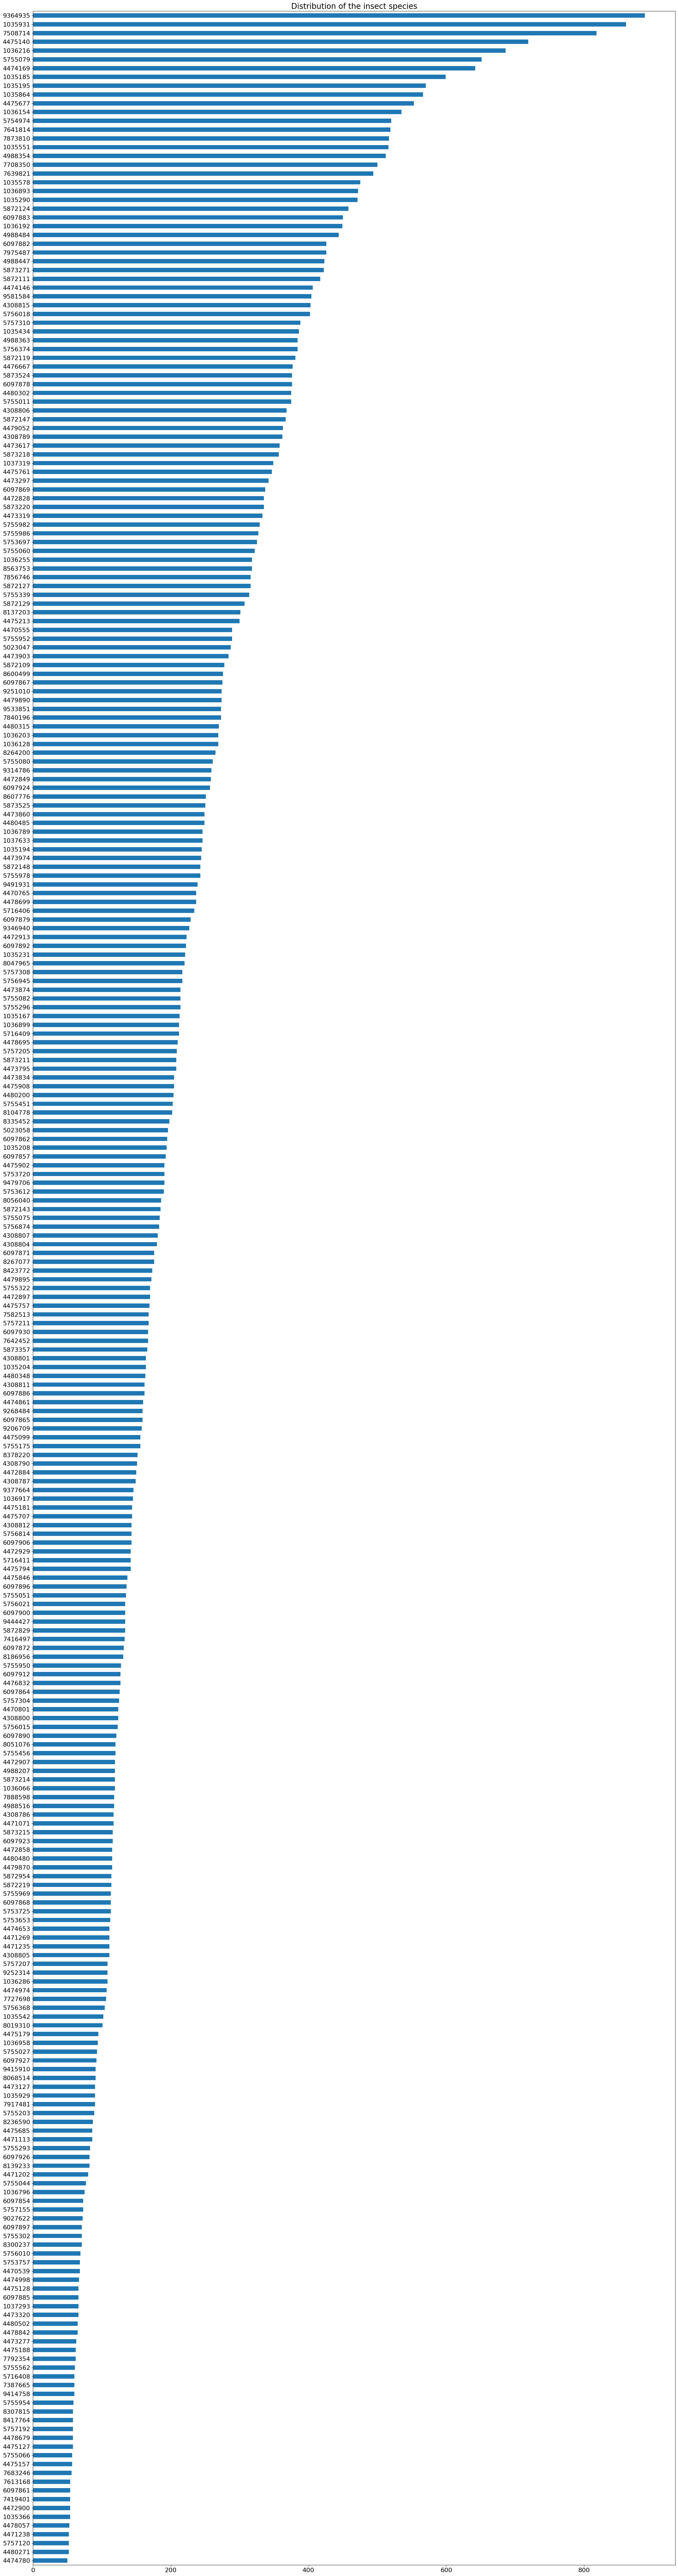

In [ ]:
# Display the distribution of different insect species, identified by the values in the 'insect_gbif' column of the DataFrame df.
bar = df['insect_gbif'].value_counts(ascending = True).plot.barh(figsize = (30, 120))
plt.title('Distribution of the insect species', fontsize = 20)
bar.tick_params(labelsize = 16)
plt.show()

In [ ]:
# Count the occurrences of each unique value in the 'insect_gbif' column.
df['insect_gbif'].value_counts()

9364935    888
1035931    861
7508714    818
4475140    719
1036216    686
          ... 
4478057     53
4480271     52
4471238     52
5757120     52
4474780     50
Name: insect_gbif, Length: 291, dtype: int64

### Load data using a Keras utility

In [ ]:
batch_size = 128
img_height = 256
img_width = 256
image_size = (img_height, img_width)
seed = 123
shuffle_value = True
validation_split = 0.3

### Split data to 70% training, 10% validation and 20% test.

#### Step 1: Split data
*   44,355 training
*   19,009 validation



In [ ]:
# Split the data to train and validation
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split = validation_split,
  subset = 'both',
  seed = seed,
  image_size = image_size,
  color_mode = 'rgb',
  batch_size = batch_size,
  shuffle = shuffle_value
)

Found 63364 files belonging to 291 classes.
Using 44355 files for training.
Using 19009 files for validation.


#### Step 2: Split validation further:
*   6,336 validation
*   12,763 test



In [ ]:
# Split validation to test and validation
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take((2 * val_batches) // 3)
val_ds = val_ds.skip((2 * val_batches) // 3)

You can find the class names in the class_names attribute on these datasets. These correspond to the directory names in alphabetical order.

In [ ]:
class_names = train_ds.class_names
print(class_names)

['1035167', '1035185', '1035194', '1035195', '1035204', '1035208', '1035231', '1035290', '1035366', '1035434', '1035542', '1035551', '1035578', '1035864', '1035929', '1035931', '1036066', '1036128', '1036154', '1036192', '1036203', '1036216', '1036255', '1036286', '1036789', '1036796', '1036893', '1036899', '1036917', '1036958', '1037293', '1037319', '1037633', '4308786', '4308787', '4308789', '4308790', '4308800', '4308801', '4308804', '4308805', '4308806', '4308807', '4308811', '4308812', '4308815', '4470539', '4470555', '4470765', '4470801', '4471071', '4471113', '4471202', '4471235', '4471238', '4471269', '4472828', '4472849', '4472858', '4472884', '4472897', '4472900', '4472907', '4472913', '4472929', '4473127', '4473277', '4473297', '4473319', '4473320', '4473617', '4473795', '4473834', '4473860', '4473874', '4473903', '4473974', '4474146', '4474169', '4474653', '4474780', '4474861', '4474974', '4474998', '4475099', '4475127', '4475128', '4475140', '4475157', '4475179', '4475181'

## Visualize the data

Verify we are able to visualize images.

Here are the first nine images from the training dataset:

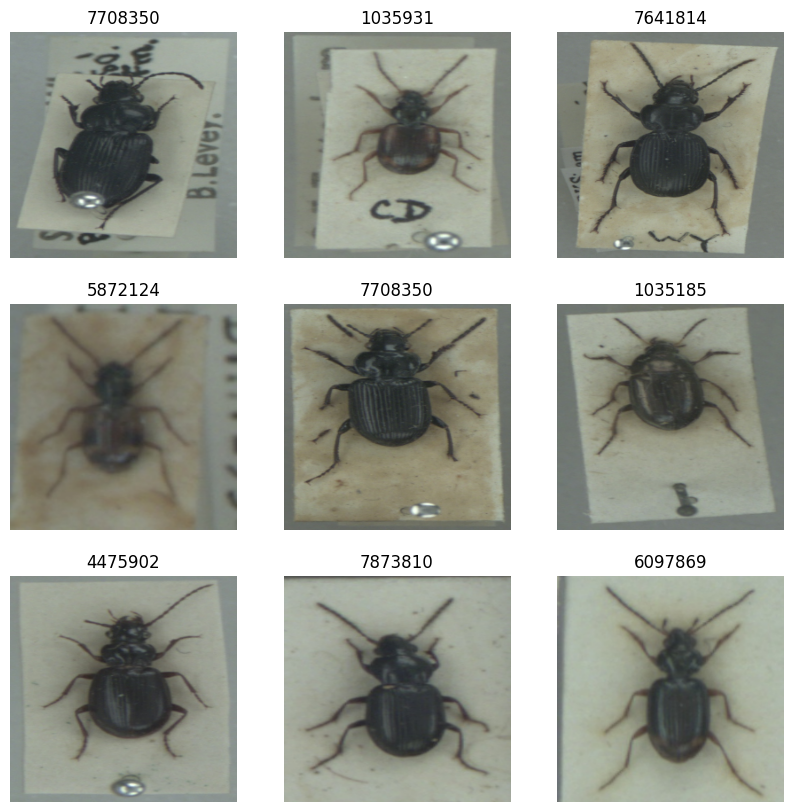

In [ ]:
# Set up a figure for plotting images. 'figsize=(10, 10)' defines the size of the figure.
plt.figure(figsize=(10, 10))

# 'train_ds.take(1)' takes one batch of images and labels from the training dataset 'train_ds'.
# The for loop iterates through this single batch.
for images, labels in train_ds.take(1):
    # This nested for loop iterates through the first 9 images and their corresponding labels in the batch.
    for i in range(9):
        # 'plt.subplot(3, 3, i + 1)' creates a subplot in a 3x3 grid format.
        # 'i + 1' is the index of the subplot where the image will be displayed.
        ax = plt.subplot(3, 3, i + 1)

        # Display the i-th image in the batch.
        # 'images[i].numpy().astype("uint8")' converts the i-th image to a NumPy array with uint8 data type,
        # which is a standard for images.
        plt.imshow(images[i].numpy().astype('uint8'))

        # Set the title of the subplot to the label of the current image.
        # 'class_names[labels[i]]' translates the label index to a human-readable class name.
        plt.title(class_names[labels[i]])

        # Turn off the axis lines and labels for a cleaner image display.
        plt.axis("off")

#### Verify image and label batch shape

In [ ]:
# Iterate over the batches of images and labels in the training dataset 'train_ds'.
for image_batch, labels_batch in train_ds:
    # Print the shape of the current batch of images.
    # 'image_batch.shape' will display the dimensions of the images in this batch,
    # typically including the number of images, height, width, and color channels (e.g., (32, 256, 256, 3) for 32 256x256 RGB images).
    print(image_batch.shape)

    # Print the shape of the current batch of labels.
    # 'labels_batch.shape' will display the dimensions of the labels array,
    # which typically includes the number of labels in the batch (e.g., (32,) for 32 labels).
    print(labels_batch.shape)

    # Break the loop after processing the first batch.
    # This is used to only check the shapes of the images and labels in the first batch without going through the entire dataset.
    break

(128, 256, 256, 3)
(128,)


The image_batch is a tensor of the shape (128, 256, 256, 3). This is a batch of 128 images of shape 256x256x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (128,), these are corresponding labels to the 128 images.

## Using image data augmentation

In [ ]:
# Define a data augmentation pipeline using Keras's Sequential model.
# Data augmentation is a technique used to increase the diversity of your training set
# by applying random but realistic transformations, such as flipping or rotation.
data_augmentation = keras.Sequential(
    [
        # Add a 'RandomFlip' layer to the Sequential model.
        # This layer will randomly flip the input images along the horizontal axis.
        # 'horizontal' indicates that the flip is along the horizontal axis.
        layers.RandomFlip('horizontal'),

        # Add a 'RandomRotation' layer to the Sequential model.
        # This layer will randomly rotate the input images during training.
        # '0.1' is the factor by which the images will be rotated.
        # It represents a fraction of 2 Pi (360 degrees), so 0.1 implies rotation by up to 36 degrees.
        # A positive value means rotating counter-clockwise.
        layers.RandomRotation(0.1)
    ]
)

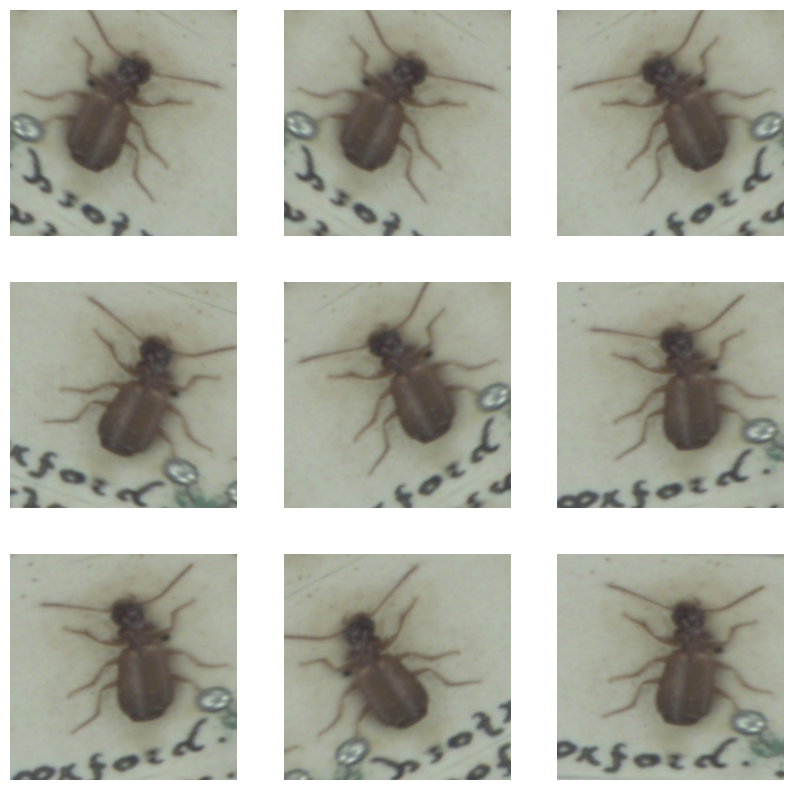

In [ ]:
# Set up a figure for plotting images with a specific size.
# 'figsize=(10, 10)' defines the size of the figure as 10x10 inches.
plt.figure(figsize = (10, 10))

# Iterate over the first batch of images from the training dataset 'train_ds'.
# 'train_ds.take(1)' takes one batch from the dataset. The '_' is a placeholder for the labels, which are ignored.
for images, _ in train_ds.take(1):
    # Iterate through the first 9 images in the batch.
    for i in range(9):
        # Apply the data augmentation defined in 'data_augmentation' to the images.
        # This will randomly apply the transformations (flip, rotation) to each image.
        augmented_images = data_augmentation(images)

        # Create a subplot in a 3x3 grid.
        # 'i + 1' is the position in the grid where the image will be plotted.
        ax = plt.subplot(3, 3, i + 1)

        # Display the first augmented image in each set of transformations.
        # '.numpy().astype('uint8')' converts the image data to a format suitable for displaying with 'imshow'.
        plt.imshow(augmented_images[0].numpy().astype('uint8'))

        # Turn off the axis to make the plot cleaner.
        plt.axis('off')

## Preprocess the data

### Configure the dataset for performance

Create a Dataset that prefetches elements from this dataset.

Most dataset input pipelines should end with a call to prefetch. This allows later elements to be prepared while the current element is being processed. This often improves latency and throughput, at the cost of using additional memory to store prefetched elements. Since the value tf.data.AUTOTUNE is used, the buffer size is dynamically tuned.

In [ ]:
# Apply `data_augmentation` to the training images.
# The 'map' function is used to apply a transformation to each element in the dataset.
# Here, a lambda function is defined to apply the 'data_augmentation' to each image in the dataset.
# The lambda function takes two arguments: 'img' (the image) and 'label' (its label),
# and it returns the augmented image along with its label.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    # 'num_parallel_calls = tf.data.AUTOTUNE' optimizes the number of parallel processing calls,
    # which can speed up the data loading and transformation process.
    num_parallel_calls=tf.data.AUTOTUNE,
)

# Prefetching the dataset.
# 'prefetch' allows the dataset to fetch batches in the background while the model is being trained.
# This helps in reducing the time the model spends waiting for data, thus improving efficiency.
# 'tf.data.AUTOTUNE' allows TensorFlow to automatically tune the amount of prefetching dynamically at runtime.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

# The same prefetching is applied to the validation dataset.
# This is important as it also helps in speeding up the validation process during training.
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

## Build a model

Building a neural network model for tasks such as image classification often involves a sequence of layers, each serving a specific purpose. Here's a more detailed explanation of the model building process as described in your statement:

1. **Starting with a Data Augmentation Preprocessor:**
   - The model begins with a data augmentation preprocessor. Data augmentation is a technique used to increase the diversity of the training dataset by applying random, yet realistic, transformations to the input images. This might include operations like rotating, zooming, flipping, etc.
   - Including data augmentation as the first layer in the model ensures that every image passed through the model during training is slightly altered, helping the model generalize better and reducing the risk of overfitting.

2. **Adding a Rescaling Layer:**
   - Following the data augmentation preprocessor, a Rescaling layer is added. This layer normalizes the pixel values in the image.
   - Typically, image data comes with pixel values in the range of 0-255. The Rescaling layer adjusts these values to a scale that's more suitable for neural network models, often between 0 and 1. For example, dividing each pixel value by 255 achieves this normalization.

3. **Incorporating a Dropout Layer Before Final Classification:**
   - Before the final classification layer, a Dropout layer is incorporated into the model. Dropout is a regularization technique that randomly sets a fraction of the input units to 0 at each update during training time, which helps prevent overfitting.
   - The Dropout layer essentially forces the model to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.
   - This layer is particularly important for complex models that are prone to overfitting, especially when trained on datasets of limited size.

4. **Final Classification Layer:**
   - The model concludes with a classification layer, which is typically a Dense layer with an activation function that corresponds to the problem at hand (e.g., a softmax activation for multi-class classification tasks).
   - The number of neurons in this final layer corresponds to the number of output classes. For binary classification, a single neuron with a sigmoid activation function might be used, while for multi-class classification problems, multiple neurons (equal to the number of classes) with a softmax activation function are common.

This structured approach in building the model – starting from data augmentation, normalizing data, adding regularization techniques, and ending with a proper classification layer – is designed to create a robust neural network capable of not only learning patterns in the training data but also generalizing well to new, unseen data.

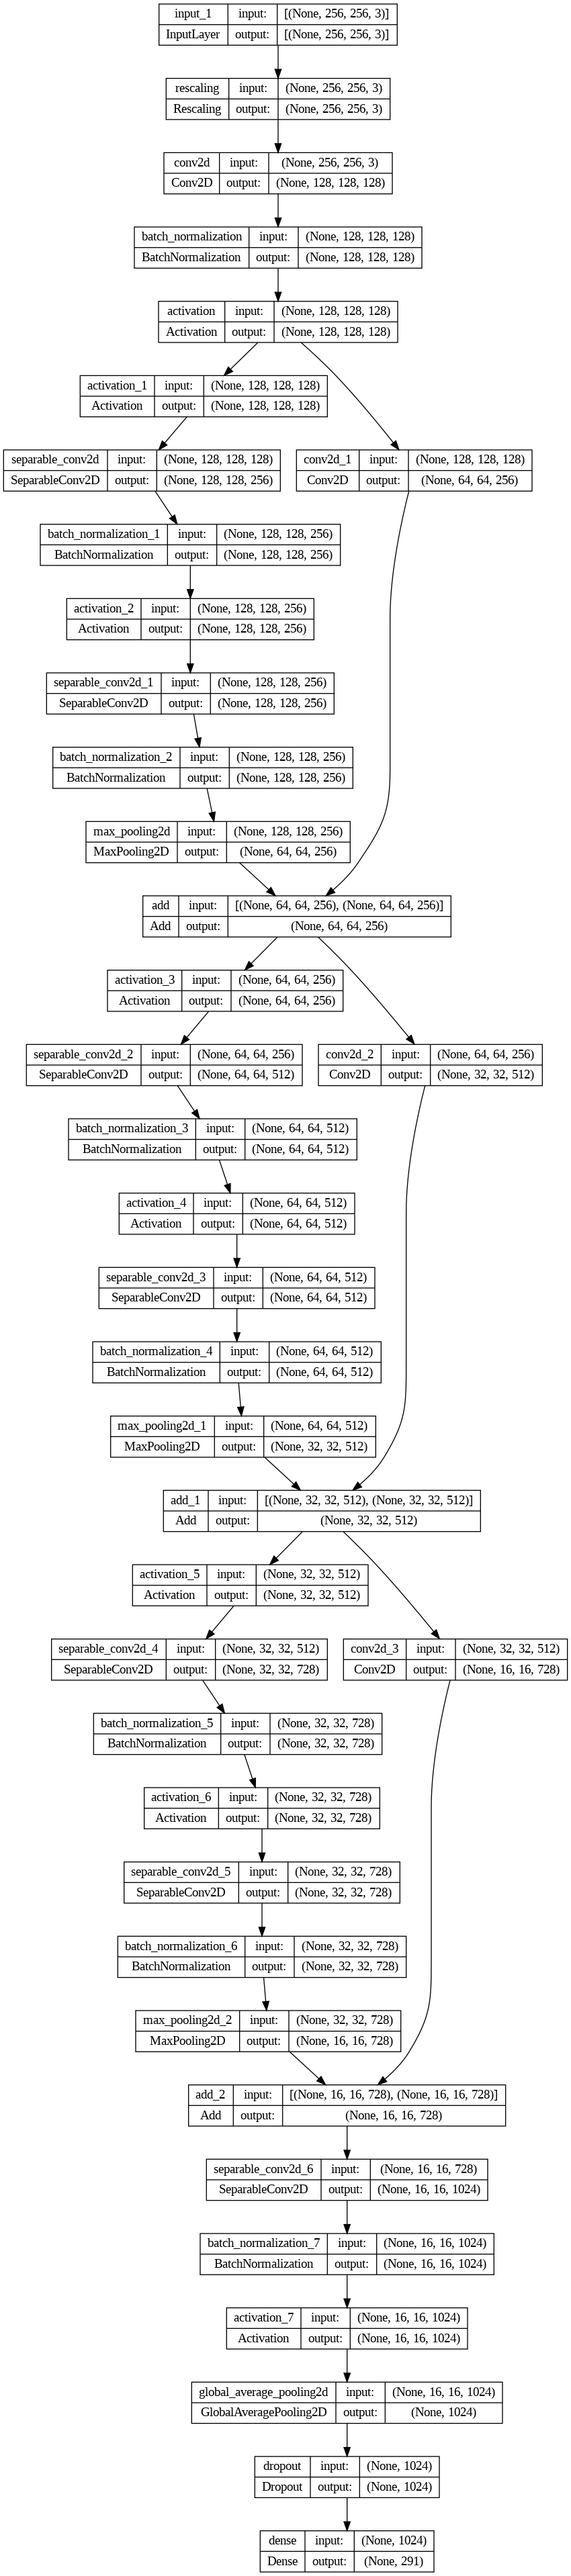

In [ ]:
def make_model(input_shape, num_classes):
    # Define the input layer with the specified shape (excluding batch size),
    # typically including height, width, and depth (e.g., channels in an image).
    inputs = keras.Input(shape = input_shape)

    # Entry block

    # Add a layer to rescale pixel values from [0, 255] to [0, 1],
    # which is a common practice to aid in neural network training.
    x = layers.Rescaling(1.0 / 255)(inputs)

    # Add a 2D convolution layer with 128 filters, a kernel size of 3x3,
    # stride of 2 (to reduce the spatial dimensions), and 'same' padding to keep the spatial dimensions unchanged.
    x = layers.Conv2D(128, 3, strides = 2, padding = 'same')(x)

    # Normalize the outputs from the previous layer,
    # which helps in stabilizing and speeding up training.
    x = layers.BatchNormalization()(x)

    # Apply a ReLU activation function to introduce non-linearity.
    x = layers.Activation('relu')(x)

    # Save the current state (output) of the network to be used as a residual connection later.
    previous_block_activation = x

    # Sequentially iterate over a set of filter sizes.
    # This loop creates multiple blocks of depthwise separable convolutions,
    # a computationally efficient alternative to regular convolutions.
    for size in [256, 512, 728]:
        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(size, 3, padding = 'same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(size, 3, padding = 'same')(x)
        x = layers.BatchNormalization()(x)

        # Apply max pooling to downsample the feature maps and reduce their dimensions.
        x = layers.MaxPooling2D(3, strides = 2, padding = 'same')(x)

        # Project residual: adapt the residual tensor to have the same shape as the current output.
        residual = layers.Conv2D(size, 1, strides = 2, padding = 'same')(previous_block_activation)

        # Add the residual tensor back to the output of the layer block,
        # enabling the flow of information and gradients through the network,
        # which helps in training deeper architectures.
        x = layers.add([x, residual])

        # Update the residual to the current state of the network.
        previous_block_activation = x

    # Add a final depthwise separable convolution layer with a large number of filters.
    x = layers.SeparableConv2D(1024, 3, padding = 'same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Apply global average pooling to reduce each feature map to a single value,
    # which helps in reducing the number of parameters and computations in the network.
    x = layers.GlobalAveragePooling2D()(x)

    # Decide the activation function and the number of units for the output layer,
    # based on whether it's binary classification (2 classes) or multi-class.
    if num_classes == 2:
        activation = 'sigmoid'  # Use sigmoid for binary classification.
        units = 1
    else:
        activation = 'softmax'  # Use softmax for multi-class classification.
        units = num_classes

    # Add a Dropout layer to reduce overfitting by randomly setting a fraction of the input units to 0.
    x = layers.Dropout(0.5)(x)

    # Define the output layer with the appropriate number of units and activation function.
    outputs = layers.Dense(units, activation = activation)(x)

    # Construct the model with the specified inputs and outputs.
    return keras.Model(inputs, outputs)

# Instantiate the model with the specified input shape and number of classes.
model = make_model(input_shape=image_size + (3,), num_classes = 291)

# Generate a plot of the model architecture, showing the shape and connectivity of each layer.
keras.utils.plot_model(model, show_shapes = True)

In [ ]:
# Prints a string summary of the network.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 12  3584        ['rescaling[0][0]']              
                                8)                                                                
                                                                                              

## Train the model

In [ ]:
# Set the number of epochs, which are iterations over the entire dataset, to train the model.
epochs = 100

# Define callbacks, which are utilities called at certain points during training.
# Here, a ModelCheckpoint callback is used to save the model at the end of each epoch.
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras")
]

# Compile the model with necessary configurations for training.
# - Optimizer: Adam, a popular optimization algorithm, with a learning rate of 1e-3.
# - Loss function: 'sparse_categorical_crossentropy', suitable for multi-class classification
#   tasks where each class is mutually exclusive.
# - Metrics: Various metrics to monitor during training, including accuracy, mean absolute error (mae),
#   categorical accuracy, sparse categorical accuracy, and top-k categorical accuracy for k = 5.
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
    loss = 'sparse_categorical_crossentropy',
    metrics = [
        'accuracy',
        'mae',
        metrics.categorical_accuracy,
        metrics.sparse_categorical_accuracy,
        metrics.TopKCategoricalAccuracy(k = 5),
    ],
)

# Start training the model.
# - train_ds: The training dataset.
# - epochs: The number of epochs to train the model.
# - callbacks: The list of callbacks to apply during training.
# - validation_data: The dataset to use for validation.
# - use_multiprocessing: Enables the use of multiprocessing for data loading, improving performance.
history = model.fit(
    train_ds,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = val_ds,
    use_multiprocessing = True
)

Epoch 1/100
347/347 [==============================] - 994s 3s/step - loss: 3.8158 - accuracy: 0.1710 - mae: 140.0289 - categorical_accuracy: 6.7636e-04 - sparse_categorical_accuracy: 0.1710 - top_k_categorical_accuracy: 0.0075 - val_loss: 8.6357 - val_accuracy: 0.0038 - val_mae: 140.2227 - val_categorical_accuracy: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0038 - val_top_k_categorical_accuracy: 0.0000e+00
Epoch 2/100
347/347 [==============================] - 140s 397ms/step - loss: 2.0647 - accuracy: 0.4476 - mae: 140.0289 - categorical_accuracy: 0.0015 - sparse_categorical_accuracy: 0.4476 - top_k_categorical_accuracy: 0.0166 - val_loss: 7.3737 - val_accuracy: 0.0431 - val_mae: 140.2227 - val_categorical_accuracy: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0431 - val_top_k_categorical_accuracy: 0.0013
Epoch 3/100
347/347 [==============================] - 140s 398ms/step - loss: 1.3760 - accuracy: 0.6079 - mae: 140.0289 - categorical_accuracy: 0.0025 - sparse_categorical_

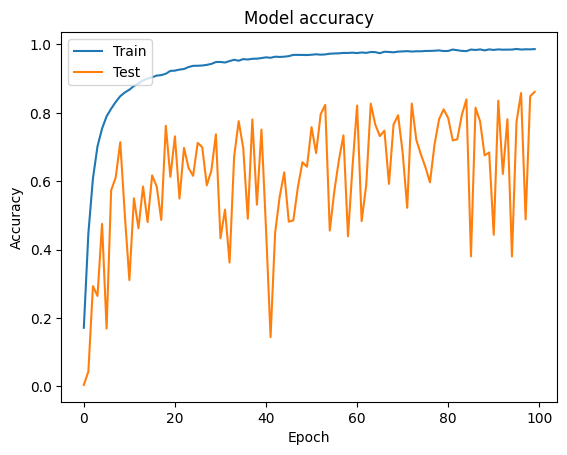

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

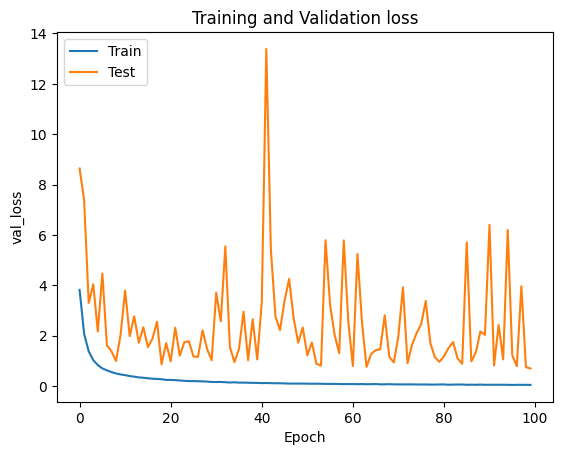

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

## Evaluating the model

In [ ]:
# Evaluate the model's performance on the training dataset.
# 'model.evaluate' returns the loss value & metrics values for the model in test mode.
# Computation is done in batches (hence, the dataset passed is 'train_ds').
train_score = model.evaluate(train_ds)

# Print the training loss.
# 'train_score[0]' refers to the first element in the result returned by 'model.evaluate', which is the loss.
print('Train loss:', train_score[0])

# Print the training accuracy.
# 'train_score[1]' refers to the second element, which in this case is the accuracy metric.
print('Train accuracy:', train_score[1])

# Print the Mean Absolute Error (MAE) for the training data.
# 'train_score[2]' refers to the third element, which is the MAE metric in this setup.
print('Train mae:', train_score[2])

347/347 [==============================] - 61s 169ms/step - loss: 0.3338 - accuracy: 0.9080 - mae: 140.0289 - categorical_accuracy: 0.0034 - sparse_categorical_accuracy: 0.9080 - top_k_categorical_accuracy: 0.0225
Train loss: 0.33379465341567993
Train accuracy: 0.9080374240875244
Train mae: 140.0289306640625


In [ ]:
# Evaluate the model's performance on the test dataset.
# 'model.evaluate' computes the loss and metrics for the model in test mode.
# The test dataset 'test_ds' is passed to this function, and evaluation is done in batches.
test_score = model.evaluate(test_ds)

# Print the test loss.
# 'test_score[0]' refers to the first element in the array returned by 'model.evaluate', which is the loss on the test dataset.
print('Test loss:', test_score[0])

# Print the test accuracy.
# 'test_score[1]' refers to the second element in the array, which in this case is the accuracy metric on the test dataset.
print('Test accuracy:', test_score[1])

# Print the Mean Absolute Error (MAE) for the test data.
# 'test_score[2]' refers to the third element in the array, which is the MAE metric in this setup.
print('Test mae:', test_score[2])

99/99 [==============================] - 12s 116ms/step - loss: 0.7054 - accuracy: 0.8579 - mae: 137.8542 - categorical_accuracy: 0.0047 - sparse_categorical_accuracy: 0.8579 - top_k_categorical_accuracy: 0.0250
Test loss: 0.7053909301757812
Test accuracy: 0.857875645160675
Test mae: 137.85415649414062


## Save Model

In [ ]:
# Save the model to file
filename = 'finalized_model.pkl'

with open(filename, 'wb') as file:
  pickle.dump(model, file)

## Load the Model

In [ ]:
with open(filename, 'rb') as file:
  loaded_model = pickle.load(file)

## Conclusions

In this individual research project, I successfully developed a Convolutional Neural Network (CNN) for Insect Image Classification, achieving noteworthy results. The model attained a high training accuracy of 98.64% with a loss of 4.04%, and on the test set, it demonstrated an accuracy of 85.79% with a loss of 70.74%. These results are encouraging, yet a detailed analysis of the learning curves and dataset composition suggests areas for further refinement.

During the evaluation of learning curves, I observed that the model neither underfit nor overfit the training data. Underfitting typically manifests as a persistently flat training loss, or a continuously decreasing loss until the end of training, neither of which was present in this case. Overfitting, indicated by a continuously decreasing training loss or an initial decrease in validation loss followed by an increase, was also not observed. However, the learning curve for the validation loss exhibited fluctuating and somewhat noisy movements in comparison to the training loss. This pattern indicates that the validation dataset may not have been fully representative, potentially affecting my ability to accurately assess the model's generalization.

The dataset composition played a crucial role in this observation. From the 63,364 insect images available from Kaggle (https://www.kaggle.com/kmldas/insect-identification-from-habitus-images), I allocated 43,355 images for training, 6,336 for validation, and 12,672 for testing. The relatively smaller size and possibly limited diversity of the validation set might have constrained its capacity to thoroughly challenge the model, thereby influencing the evaluation results.

In conclusion, while the achieved results demonstrate the viability of using CNNs for classifying insect images, they also underscore the importance of a well-balanced and representative dataset for both training and validation. This project highlights the need for a larger and more varied set of images to ensure a robust evaluation of the model's generalization abilities. With a more comprehensive dataset encompassing a wider array of insect species, I am confident that the effectiveness of CNNs in this domain can be more conclusively established. This endeavor illustrates both the potential and the challenges in the field of image classification, paving the way for further research and development.